# Formula 1 Las Vegas Grand Prix Simulation: Data Visualization

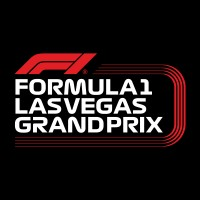

In [63]:
from IPython.display import Image, display
display(Image(filename='f1lasvegas_logo.jpg'))


#### For this Simulation I played EA Sports F1 23 on Xbox Series S and captured the Game/Race data and performed the below data visualization.
Here is the Las Vegas Grand Prix highlights
https://www.xbox.com/en-us/play/media/hrwtv59pt3

## Data visualization is a powerful tool in Formula 1 racing for several reasons:

## 1. Performance Analysis:
Formula 1 teams collect massive amounts of data during races and practice sessions. Visualizing this data helps teams analyze driver performance, car behavior, and the effectiveness of strategies. It allows for quick identification of trends, strengths, and weaknesses.

## 2. Strategy Development:
Data visualizations are crucial for developing race strategies. Teams can visualize tire wear, fuel consumption, and lap times to make informed decisions on pit stops, tire choices, and fuel management. This helps in optimizing race strategy to gain a competitive edge.

## 3. Communication:
Complex data can be challenging to interpret. Visualizations make it easier to communicate insights to team members, drivers, and stakeholders. Clear graphs and charts convey important information quickly and effectively, aiding in decision-making.

## 4. Real-Time Decision Making:
During a race, real-time data visualization is essential. It allows teams to monitor the car's health, track conditions, and competitor performance. This helps in making immediate decisions, such as adjusting car settings or modifying race strategy based on the evolving race dynamics.

## 5. Engineering Improvements:
Visualization of data from sensors and telemetry enables engineers to improve car design and performance. By analyzing visualized data, engineers can identify areas for improvement, such as aerodynamics, engine performance, and suspension settings.

## 6. Fan Engagement:
Data visualization enhances the viewing experience for fans. Televised broadcasts and interactive platforms use visualizations to explain race dynamics, lap times, and other statistics. This makes the sport more engaging and accessible to fans.

## 7. Competitive Advantage:
Teams that effectively utilize data visualization can gain a competitive advantage. By turning raw data into actionable insights, teams can fine-tune their strategies, improve performance, and ultimately, achieve better race results.

In summary, data visualization transforms complex data into actionable insights, enabling teams to make informed decisions, optimize performance, and engage fans, all of which are crucial in the highly competitive world of Formula 1 racing.

import pandas as pd

# Read the CSV file
df = pd.read_csv('f1.csv')

# Display the first few rows of the dataframe to check the data
print(df.head())


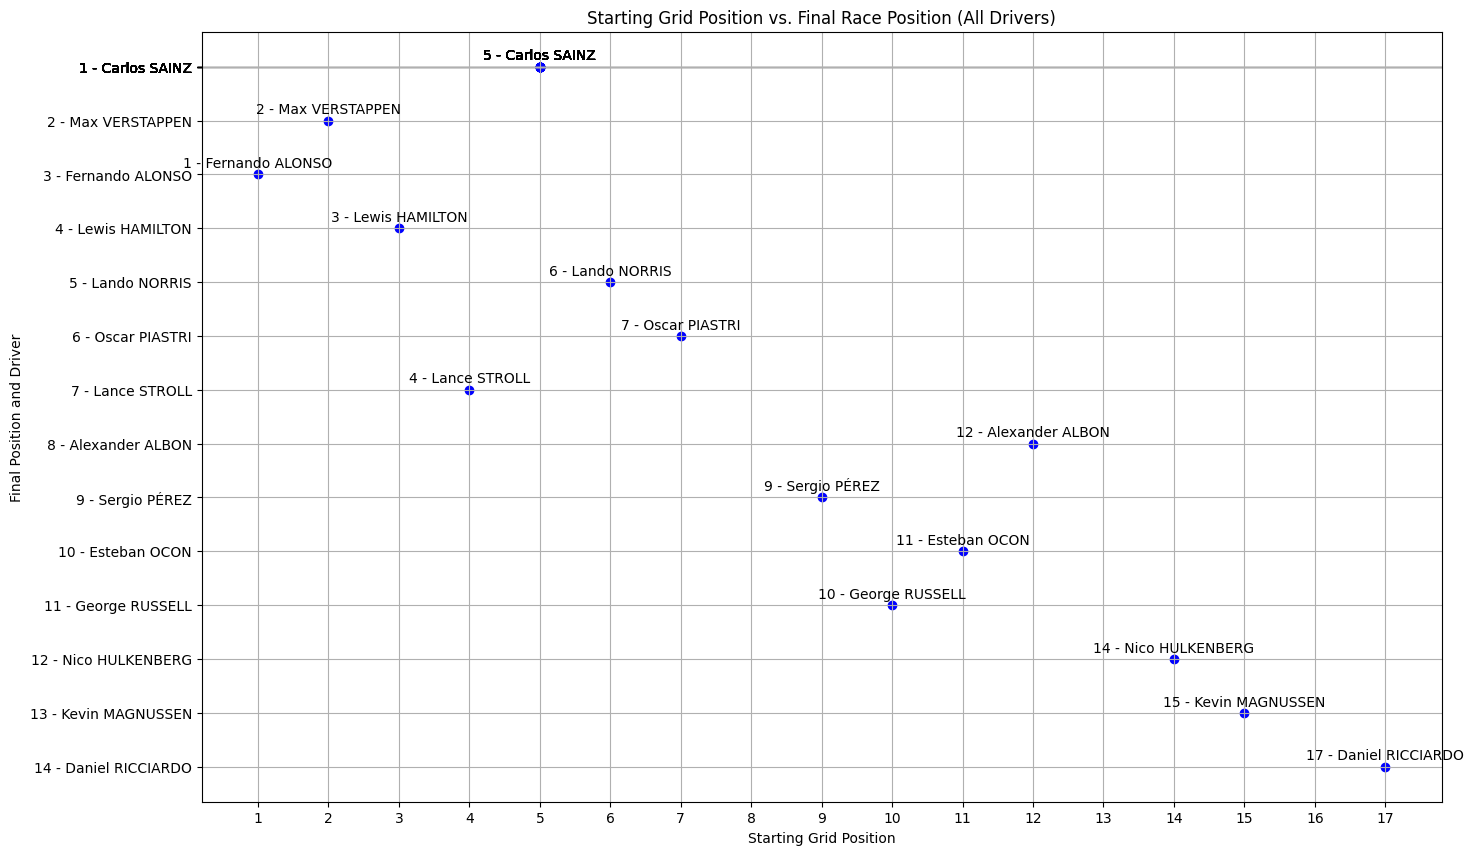

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('f1.csv')

# Sort by the final race position
sorted_df = df.sort_values(by='POS.')

# Add position numbers before driver names
sorted_df['Driver with Position'] = sorted_df.apply(lambda row: f"{row['GRID']} - {row['DRIVER']}", axis=1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))

# Plot each driver's starting position
ax.scatter(sorted_df['GRID'], sorted_df['POS.'], color='blue')

# Annotate each point with the starting grid position and driver's name
for i, row in sorted_df.iterrows():
    ax.annotate(f"{row['GRID']} - {row['DRIVER']}", (row['GRID'], row['POS.']), textcoords="offset points", xytext=(0,5), ha='center')

# Customize the plot
ax.set_xlabel('Starting Grid Position')
ax.set_ylabel('Final Position and Driver')
ax.set_title('Starting Grid Position vs. Final Race Position (All Drivers)')
ax.set_yticks(sorted_df['POS.'])
ax.set_yticklabels([f"{row['POS.']} - {row['DRIVER']}" for _, row in sorted_df.iterrows()])
ax.set_xticks(range(1, sorted_df['GRID'].max() + 1))

# Invert y-axis to have the first position at the top
ax.invert_yaxis()

plt.grid(True)
plt.show()


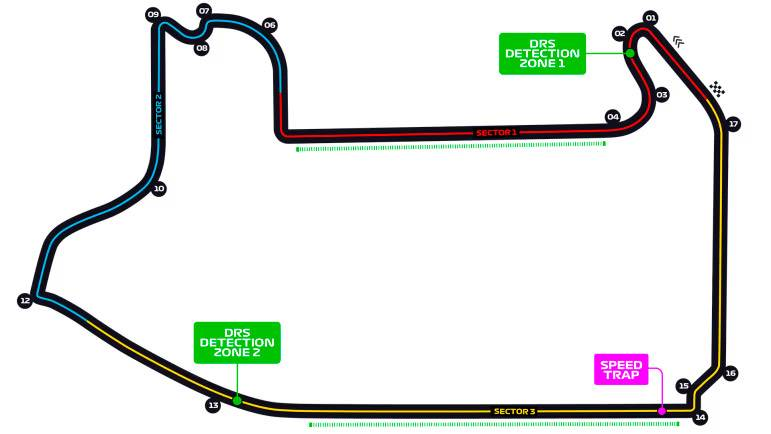

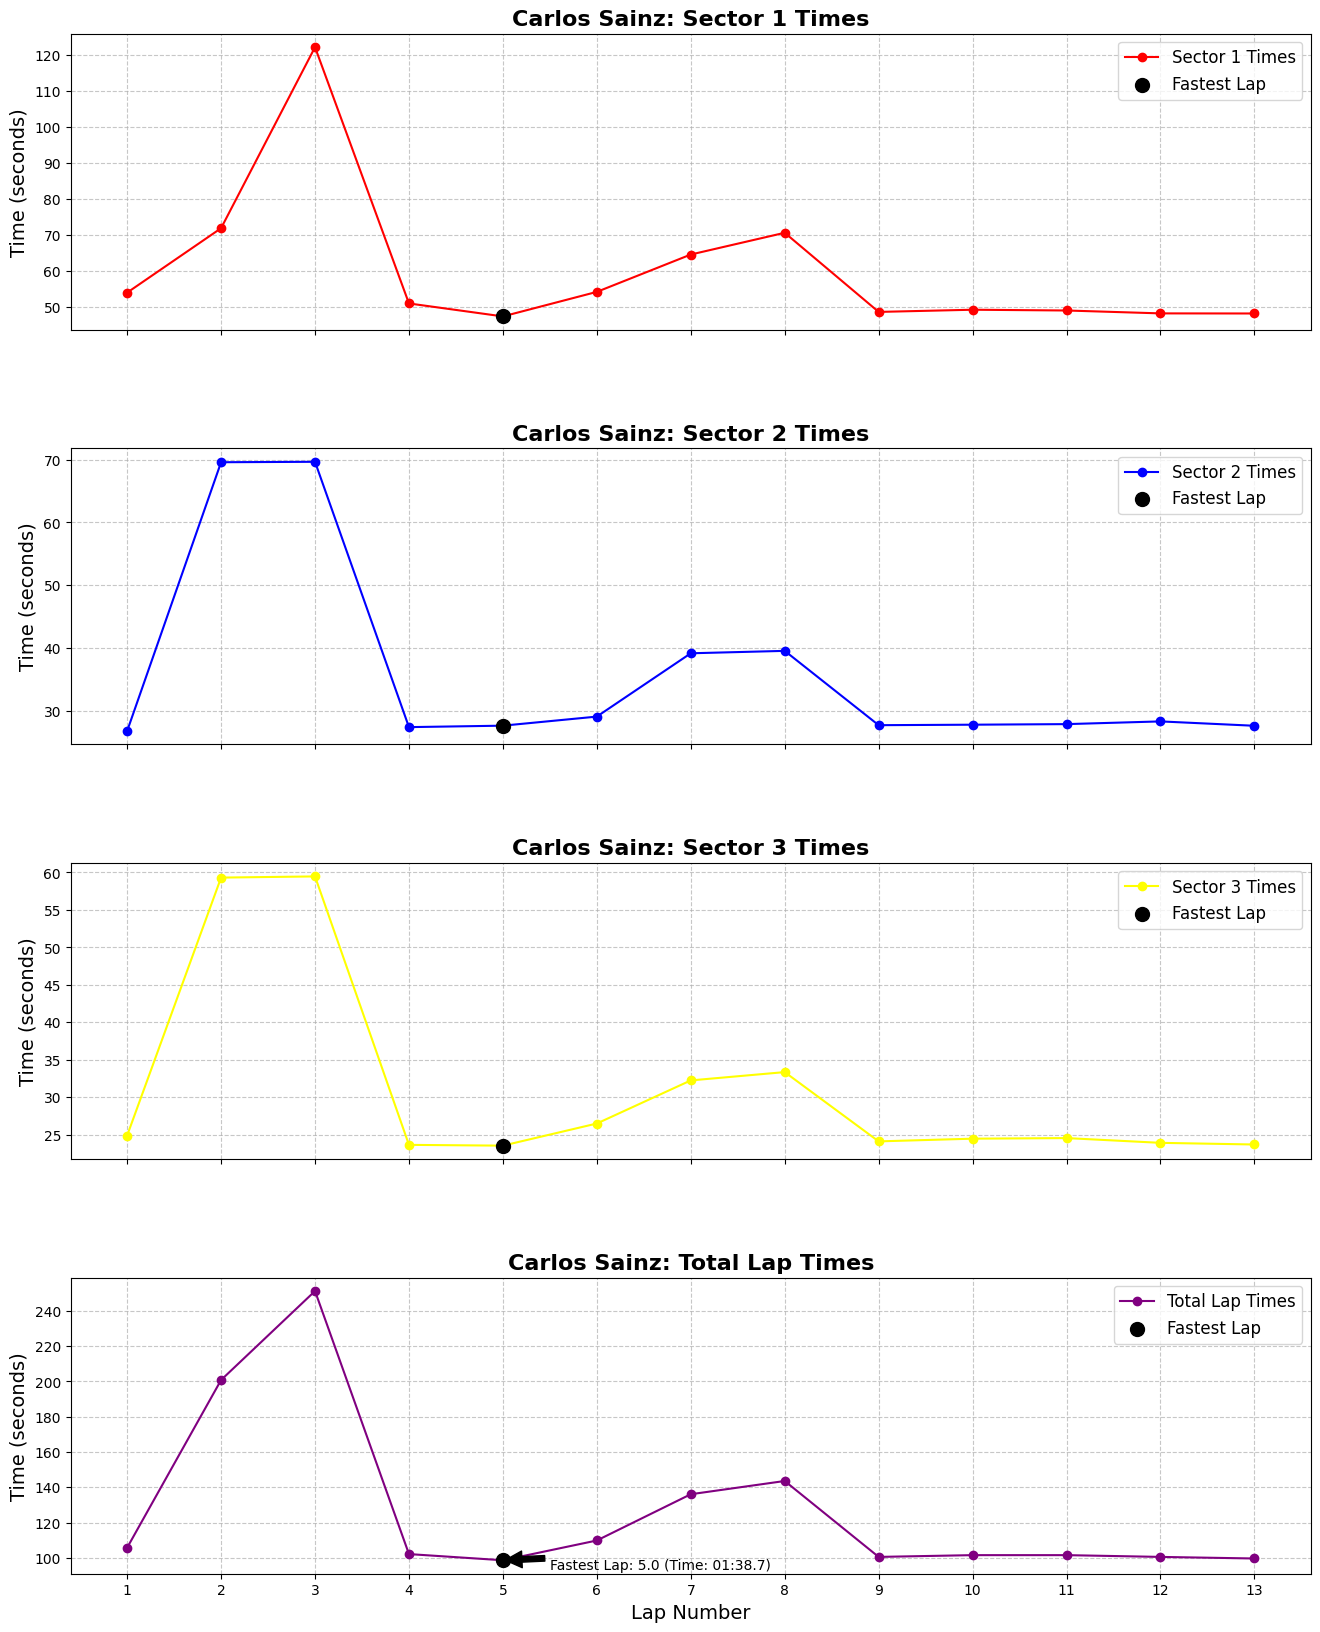

In [62]:
from IPython.display import Image, display
display(Image(filename='strip.jpg'))

# Function to convert lap time to seconds
def time_to_seconds(lap_time):
    if pd.isna(lap_time):
        return float('inf')
    min_sec = lap_time.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

# Apply the conversion to the 'LAP TIME' column
df['LAP TIME SECONDS'] = df['LAP TIME'].apply(time_to_seconds)

# Remove rows with NaN values in 'LAP' or 'LAP TIME SECONDS'
df_clean = df.dropna(subset=['LAP', 'LAP TIME SECONDS']).copy()

# Convert 'LAP' to integer
df_clean.loc[:, 'LAP'] = df_clean['LAP'].astype(int)

# Find the fastest lap
fastest_lap = df_clean.loc[df_clean['LAP TIME SECONDS'].idxmin()]

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 20), sharex=True)

# Plot Sector 1 times
axs[0].plot(df_clean['LAP'], df_clean['SECTOR 1'], marker='o', label='Sector 1 Times', color='red')
axs[0].scatter(fastest_lap['LAP'], fastest_lap['SECTOR 1'], color='black', s=100, zorder=5, label='Fastest Lap')
axs[0].set_title('Carlos Sainz: Sector 1 Times', fontsize=16, weight='bold')
axs[0].set_ylabel('Time (seconds)', fontsize=14)
axs[0].legend(loc='upper right', fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.7)

# Plot Sector 2 times
axs[1].plot(df_clean['LAP'], df_clean['SECTOR 2'], marker='o', label='Sector 2 Times', color='blue')
axs[1].scatter(fastest_lap['LAP'], fastest_lap['SECTOR 2'], color='black', s=100, zorder=5, label='Fastest Lap')
axs[1].set_title('Carlos Sainz: Sector 2 Times', fontsize=16, weight='bold')
axs[1].set_ylabel('Time (seconds)', fontsize=14)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.7)

# Plot Sector 3 times
axs[2].plot(df_clean['LAP'], df_clean['SECTOR 3'], marker='o', label='Sector 3 Times', color='yellow')
axs[2].scatter(fastest_lap['LAP'], fastest_lap['SECTOR 3'], color='black', s=100, zorder=5, label='Fastest Lap')
axs[2].set_title('Carlos Sainz: Sector 3 Times', fontsize=16, weight='bold')
axs[2].set_ylabel('Time (seconds)', fontsize=14)
axs[2].legend(loc='upper right', fontsize=12)
axs[2].grid(True, linestyle='--', alpha=0.7)

# Plot Total Lap Times
axs[3].plot(df_clean['LAP'], df_clean['LAP TIME SECONDS'], marker='o', label='Total Lap Times', color='purple')
axs[3].scatter(fastest_lap['LAP'], fastest_lap['LAP TIME SECONDS'], color='black', s=100, zorder=5, label='Fastest Lap')
axs[3].set_title('Carlos Sainz: Total Lap Times', fontsize=16, weight='bold')
axs[3].set_xlabel('Lap Number', fontsize=14)
axs[3].set_ylabel('Time (seconds)', fontsize=14)
axs[3].legend(loc='upper right', fontsize=12)
axs[3].grid(True, linestyle='--', alpha=0.7)
axs[3].set_xticks(df_clean['LAP'])

# Annotate the fastest lap in the total lap times plot
axs[3].annotate(f"Fastest Lap: {fastest_lap['LAP']} (Time: {fastest_lap['LAP TIME']})",
                xy=(fastest_lap['LAP'], fastest_lap['LAP TIME SECONDS']),
                xytext=(fastest_lap['LAP'] + 0.5, fastest_lap['LAP TIME SECONDS'] - 5),
                arrowprops=dict(facecolor='black', shrink=0.05))

# Adjust layout manually instead of using tight_layout
fig.subplots_adjust(hspace=0.4)
plt.show()


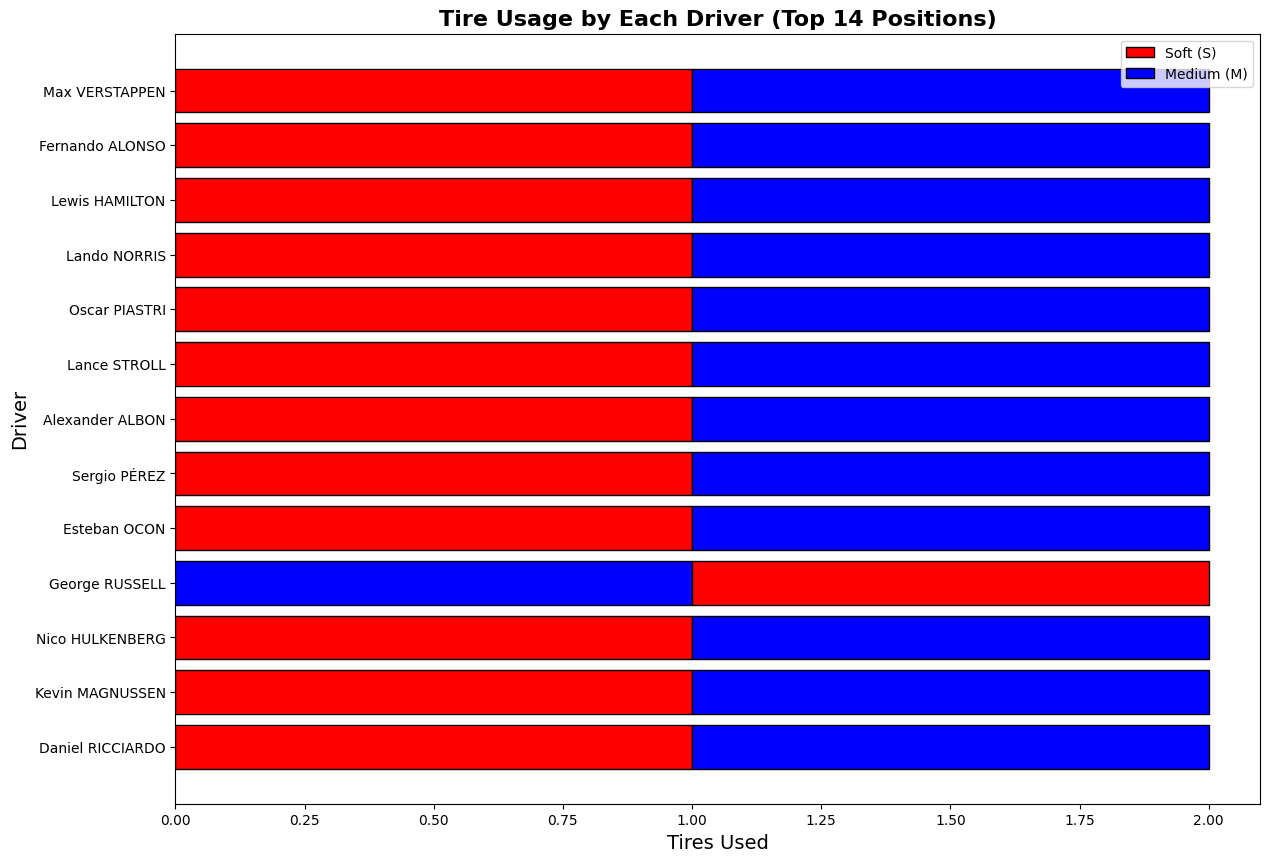

In [57]:
# Filter relevant columns and drop duplicates
tire_data = df[['POS.', 'DRIVER', 'TYRE']].dropna().drop_duplicates()
tire_data = tire_data[tire_data['POS.'] <= 14]

# Exclude Carlos Sainz
tire_data = tire_data[tire_data['DRIVER'] != 'Carlos SAINZ']

# Define the tire colors
tire_colors = {
    'S': 'red',  # Soft tire
    'M': 'blue'  # Medium tire
}

# Function to map tire combinations to individual colors
def map_tire_colors(tyres):
    colors = []
    for char in tyres:
        if char in tire_colors:
            colors.append(tire_colors[char])
    return colors

# Sort data by position in ascending order
tire_data = tire_data.sort_values(by='POS.', ascending=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each driver with tire colors
for i, row in tire_data.iterrows():
    tyres = row['TYRE']
    colors = map_tire_colors(tyres)
    for j, color in enumerate(colors):
        ax.barh(row['DRIVER'], 1, left=j, color=color, edgecolor='black')

# Add title and labels
ax.set_title('Tire Usage by Each Driver (Top 14 Positions)', fontsize=16, weight='bold')
ax.set_xlabel('Tires Used', fontsize=14)
ax.set_ylabel('Driver', fontsize=14)
ax.invert_yaxis()  # Invert y-axis to display from top to down

# Add legend
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Soft (S)'),
    Patch(facecolor='blue', edgecolor='black', label='Medium (M)')
]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()


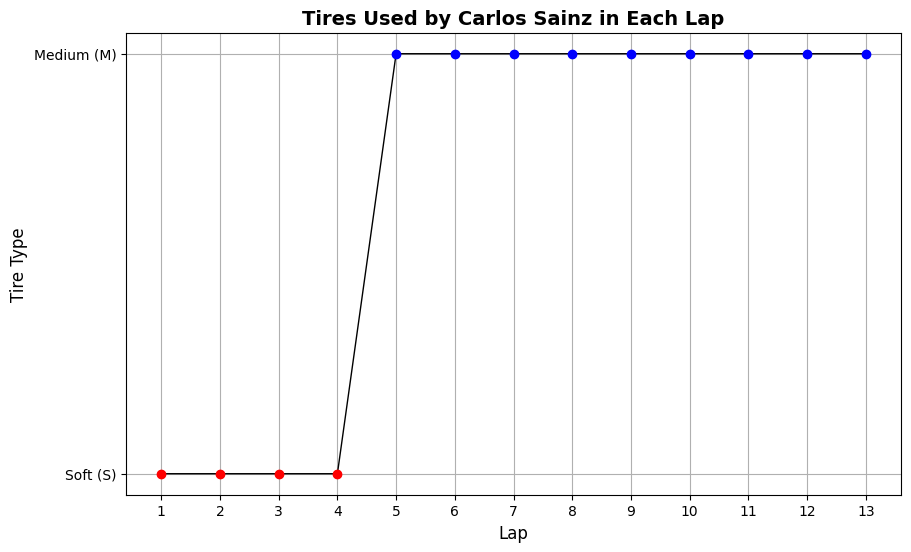

In [58]:
# Filter data for Carlos Sainz
sainz_data = df[df['DRIVER'] == 'Carlos SAINZ']

# Filter relevant columns and drop duplicates
lap_data = sainz_data[['LAP', 'TYRE']].dropna().drop_duplicates()

# Define the tire colors and mapping
tire_colors = {
    'S': 'red',  # Soft tire
    'M': 'blue'  # Medium tire
}
tire_mapping = {
    'S': 1,
    'M': 2
}

# Map the tires to their numerical values
lap_data['TIRE_NUM'] = lap_data['TYRE'].map(tire_mapping)
lap_data['COLOR'] = lap_data['TYRE'].map(tire_colors)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted figure size

# Plot the tire usage with lines and markers
ax.plot(lap_data['LAP'], lap_data['TIRE_NUM'], marker='o', linestyle='-', color='black', linewidth=1, markersize=5)

# Plot the tire usage with colored markers
for i, row in lap_data.iterrows():
    ax.plot(row['LAP'], row['TIRE_NUM'], marker='o', color=row['COLOR'])

# Add title and labels with smaller fonts
ax.set_title('Tires Used by Carlos Sainz in Each Lap', fontsize=14, weight='bold')
ax.set_xlabel('Lap', fontsize=12)
ax.set_ylabel('Tire Type', fontsize=12)

# Set y-axis labels to tire types
ax.set_yticks([1, 2])
ax.set_yticklabels(['Soft (S)', 'Medium (M)'])

# Show all lap numbers on x-axis with smaller labels and no decimal points
ax.set_xticks(lap_data['LAP'])
ax.set_xticklabels(lap_data['LAP'].astype(int), fontsize=10)

# Add grid for better readability
ax.grid(True)

# Display the plot
plt.show()


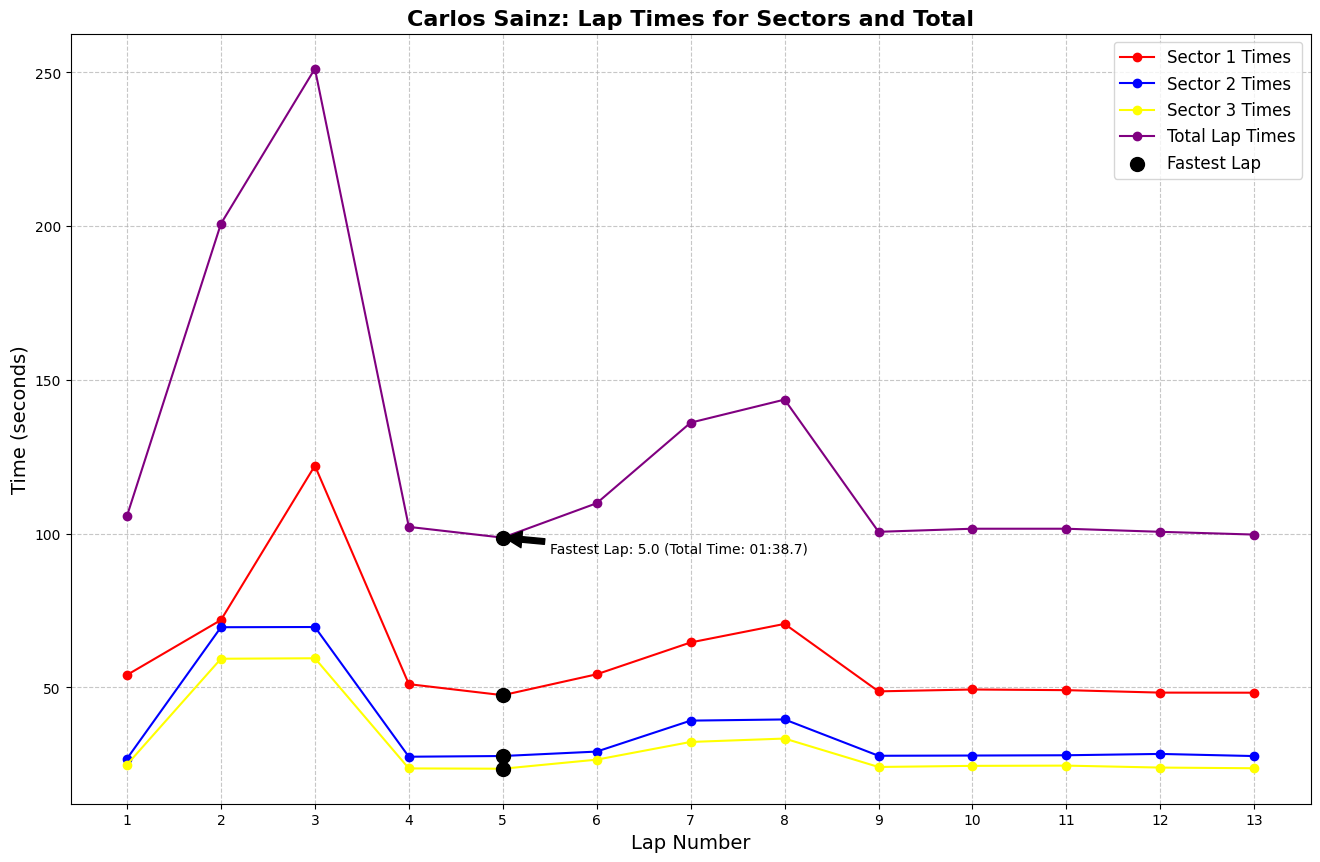

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('f1.csv')

# Function to convert lap time to seconds
def time_to_seconds(lap_time):
    if pd.isna(lap_time):
        return float('inf')
    min_sec = lap_time.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

# Apply the conversion to the 'LAP TIME' column
df['LAP TIME SECONDS'] = df['LAP TIME'].apply(time_to_seconds)

# Remove rows with NaN values in 'LAP' or 'LAP TIME SECONDS'
df_clean = df.dropna(subset=['LAP', 'LAP TIME SECONDS']).copy()

# Convert 'LAP' to integer
df_clean.loc[:, 'LAP'] = df_clean['LAP'].astype(int)

# Find the fastest lap
fastest_lap = df_clean.loc[df_clean['LAP TIME SECONDS'].idxmin()]

# Create a single plot
plt.figure(figsize=(16, 10))

# Plot Sector 1 times
plt.plot(df_clean['LAP'], df_clean['SECTOR 1'], marker='o', label='Sector 1 Times', color='red')

# Plot Sector 2 times
plt.plot(df_clean['LAP'], df_clean['SECTOR 2'], marker='o', label='Sector 2 Times', color='blue')

# Plot Sector 3 times
plt.plot(df_clean['LAP'], df_clean['SECTOR 3'], marker='o', label='Sector 3 Times', color='yellow')

# Plot Total Lap Times
plt.plot(df_clean['LAP'], df_clean['LAP TIME SECONDS'], marker='o', label='Total Lap Times', color='purple')

# Highlight the fastest lap
plt.scatter(fastest_lap['LAP'], fastest_lap['SECTOR 1'], color='black', s=100, zorder=5)
plt.scatter(fastest_lap['LAP'], fastest_lap['SECTOR 2'], color='black', s=100, zorder=5)
plt.scatter(fastest_lap['LAP'], fastest_lap['SECTOR 3'], color='black', s=100, zorder=5)
plt.scatter(fastest_lap['LAP'], fastest_lap['LAP TIME SECONDS'], color='black', s=100, zorder=5, label='Fastest Lap')

# Annotate the fastest lap
plt.annotate(f"Fastest Lap: {fastest_lap['LAP']} (Total Time: {fastest_lap['LAP TIME']})",
             xy=(fastest_lap['LAP'], fastest_lap['LAP TIME SECONDS']),
             xytext=(fastest_lap['LAP'] + 0.5, fastest_lap['LAP TIME SECONDS'] - 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and title
plt.xlabel('Lap Number', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Carlos Sainz: Lap Times for Sectors and Total', fontsize=16, weight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_clean['LAP'])

# Show the plot
plt.show()


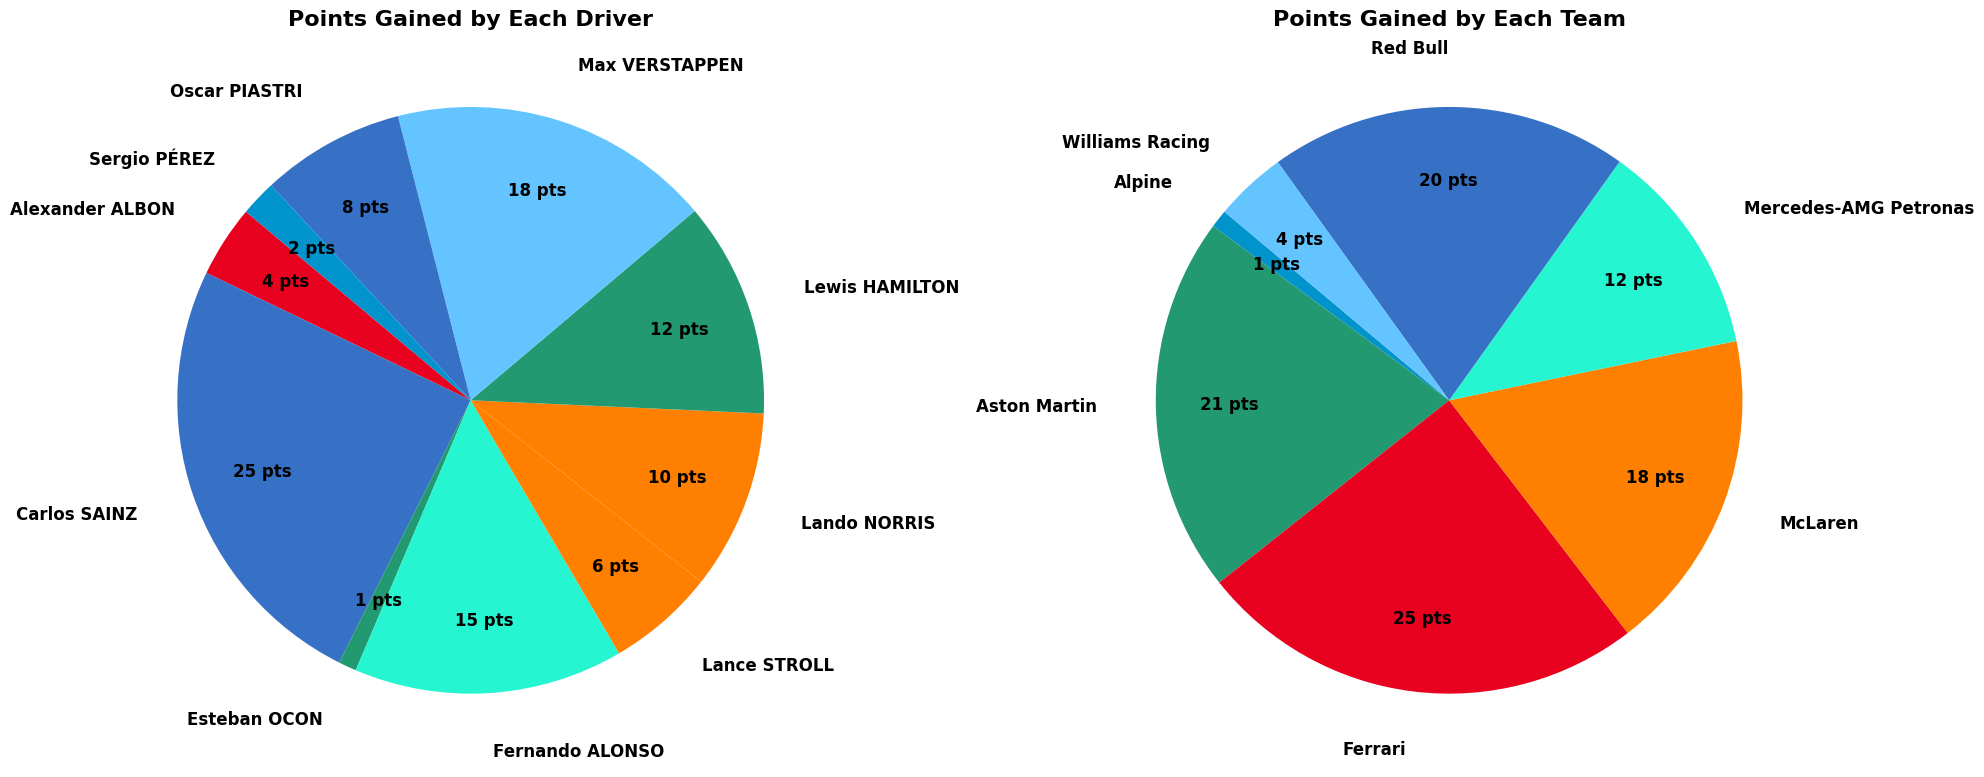

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with driver names and their points
driver_points_dict = {
    'Carlos SAINZ': 25,
    'Max VERSTAPPEN': 18,
    'Fernando ALONSO': 15,
    'Lewis HAMILTON': 12,
    'Lando NORRIS': 10,
    'Oscar PIASTRI': 8,
    'Lance STROLL': 6,
    'Alexander ALBON': 4,
    'Sergio PÉREZ': 2,
    'Esteban OCON': 1
}

# Convert the dictionary to a DataFrame
points_df = pd.DataFrame(list(driver_points_dict.items()), columns=['DRIVER', 'POINTS'])

# Merge the points DataFrame with the original DataFrame
df = pd.merge(df, points_df, on='DRIVER', how='left')

# Filter out relevant data and remove zero points
points_data = df[['DRIVER', 'TEAM', 'POINTS']].dropna().drop_duplicates()
points_data = points_data[points_data['POINTS'] > 0]

# Group by driver to sum the points
driver_points = points_data.groupby('DRIVER')['POINTS'].sum().reset_index()

# Group by team to sum the points
team_points = points_data.groupby('TEAM')['POINTS'].sum().reset_index()

# Define color palettes using team colors
team_colors = {
    'Red Bull': '#3671c6',
    'Mercedes-AMG Petronas': '#26f5d2',
    'Ferrari': '#e80220',
    'McLaren': '#ff8001',
    'Aston Martin': '#229971',
    'Alpine': '#0093cc',
    'Williams Racing': '#63c4ff',
    'AlphaTauri': '#52e252',
    'Haas': '#b6babd'
}

# Create a pie chart for drivers
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

# Function to display points instead of percentages
def autopct_points(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return "{:d} pts".format(absolute)

# Plotting driver points with team colors and added spacing
driver_colors = [team_colors[team] for team in points_data['TEAM']]
ax[0].pie(driver_points['POINTS'], labels=driver_points['DRIVER'], autopct=lambda pct: autopct_points(pct, driver_points['POINTS']), startangle=140, colors=driver_colors, textprops={'fontsize': 12, 'fontweight': 'bold'}, pctdistance=0.75, labeldistance=1.2)
ax[0].set_title('Points Gained by Each Driver', fontsize=16, weight='bold')

# Plotting team points with team colors and added spacing
team_colors_list = [team_colors[team] for team in team_points['TEAM']]
ax[1].pie(team_points['POINTS'], labels=team_points['TEAM'], autopct=lambda pct: autopct_points(pct, team_points['POINTS']), startangle=140, colors=team_colors_list, textprops={'fontsize': 12, 'fontweight': 'bold'}, pctdistance=0.75, labeldistance=1.2)
ax[1].set_title('Points Gained by Each Team', fontsize=16, weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
